# Assignment

In [1]:
# Import 

import numpy as np
import random
import matplotlib.pyplot as plt
from degree_freedom_queen import *
from degree_freedom_king1 import *
from degree_freedom_king2 import *
from generate_game import *
from Chess_env import *
from enum import Enum


size_board = 4

## The Environment

You can find the environment in the file Chess_env, which contains the class Chess_env. To define an object, you need to provide the board size considered as input. In our example, size_board=4. 
Chess_env is composed by the following methods:

1. Initialise_game. The method initialises an episode by placing the three pieces considered (Agent's king and queen, enemy's king) in the chess board. The outputs of the method are described below in order.

     S $\;$ A matrix representing the board locations filled with 4 numbers: 0, no piece in that position; 1, location of the 
     agent's king; 2 location of the queen; 3 location of the enemy king.
     
     X $\;$ The features, that is the input to the neural network. See the assignment for more information regarding the            definition of the features adopted. To personalise this, go into the Features method of the class Chess_env() and change        accordingly.
     
     allowed_a $\;$ The allowed actions that the agent can make. The agent is moving a king, with a total number of 8                possible actions, and a queen, with a total number of $(board_{size}-1)\times 8$ actions. The total number of possible actions correspond      to the sum of the two, but not all actions are allowed in a given position (movements to locations outside the borders or      against chess rules). Thus, the variable allowed_a is a vector that is one (zero) for an action that the agent can (can't)      make. Be careful, apply the policy considered on the actions that are allowed only.
     

2. OneStep. The method performs a one step update of the system. Given as input the action selected by the agent, it updates the chess board by performing that action and the response of the enemy king (which is a random allowed action in the settings considered). The first three outputs are the same as for the Initialise_game method, but the variables are computed for the position reached after the update of the system. The fourth and fifth outputs are:

     R $\;$ The reward. To change this, look at the OneStep method of the class where the rewards are set.
     
     Done $\;$ A variable that is 1 if the episode has ended (checkmate or draw).
     
     
3. Features. Given the chessboard position, the method computes the features.

This information and a quick analysis of the class should be all you need to get going. The other functions that the class exploits are uncommented and constitute an example on how not to write a python code. You can take a look at them if you want, but it is not necessary.






In [2]:
## INITIALISE THE ENVIRONMENT

env=Chess_Env(size_board)

In [5]:
## PRINT 5 STEPS OF AN EPISODE CONSIDERING A RANDOM AGENT

S,X,allowed_a=env.Initialise_game(0)                       # INTIALISE GAME

print(X)                                                  # PRINT CHESS BOARD (SEE THE DESCRIPTION ABOVE)

print('check? ',env.check)                                # PRINT VARIABLE THAT TELLS IF ENEMY KING IS IN CHECK (1) OR NOT (0)
print('dofk2 ',np.sum(env.dfk2_constrain).astype(int))    # PRINT THE NUMBER OF LOCATIONS THAT THE ENEMY KING CAN MOVE TO


for i in range(5):
    
    a,_=np.where(allowed_a==1)                  # FIND WHAT THE ALLOWED ACTIONS ARE
    a_agent=np.random.permutation(a)[0]  # MAKE A RANDOM ACTION
    print(a)
    print(a_agent)
    S,X,allowed_a,R,Done=env.OneStep(a_agent)   # UPDATE THE ENVIRONMENT
    
    
    ## PRINT CHESS BOARD AND VARIABLES
    print('')
    print(S)
    print(R,'', Done)
    print('check? ',env.check)
    print('dofk2 ',np.sum(env.dfk2_constrain).astype(int))
    
    
    # TERMINATE THE EPISODE IF Done=True (DRAW OR CHECKMATE)
    if Done:
        break
        


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
check?  0
dofk2  2
[ 0  3  4 15 21 24 25 28 29 30]
15

[[0 3 0 0]
 [0 0 0 0]
 [0 0 1 0]
 [0 0 2 0]]
0  0
check?  0
dofk2  2
[ 6  9 10 18 21 26 27 28 29 30]
10

[[0 0 3 0]
 [0 0 0 0]
 [0 0 1 0]
 [2 0 0 0]]
0  0
check?  0
dofk2  1
[ 3  4  5  6  7  8 18 19 24 26 27 28 29]
28

[[0 0 0 0]
 [0 0 0 3]
 [0 0 0 0]
 [2 0 0 1]]
0  0
check?  0
dofk2  1
[ 3  4  5  6  7 18 27]
18

[[0 0 3 0]
 [0 0 0 0]
 [0 2 0 0]
 [0 0 0 1]]
0  0
check?  0
dofk2  1
[ 0  6  7  9 12 15 21 25 27 31]
9

[[0 3 0 0]
 [0 0 0 0]
 [2 0 0 0]
 [0 0 0 1]]
0  0
check?  0
dofk2  1


In [6]:
# PERFORM N_episodes=1000 EPISODES MAKING RANDOM ACTIONS AND COMPUTE THE AVERAGE REWARD AND NUMBER OF MOVES 

S,X,allowed_a=env.Initialise_game(0)
N_episodes=1000

# VARIABLES WHERE TO SAVE THE FINAL REWARD IN AN EPISODE AND THE NUMBER OF MOVES 
R_save_random = np.zeros([N_episodes, 1])
N_moves_save_random = np.zeros([N_episodes, 1])

for n in range(N_episodes):
    
    S,X,allowed_a=env.Initialise_game(0)     # INITIALISE GAME
    Done=0                                  # SET Done=0 AT THE BEGINNING
    i=1                                     # COUNTER FOR THE NUMBER OF ACTIONS (MOVES) IN AN EPISODE
    
    # UNTIL THE EPISODE IS NOT OVER...(Done=0)
    while Done==0:
        
        # SAME AS THE CELL BEFORE, BUT SAVING THE RESULTS WHEN THE EPISODE TERMINATES 
        
        a,_=np.where(allowed_a==1)
        a_agent=np.random.permutation(a)[0]

        S,X,allowed_a,R,Done=env.OneStep(a_agent)
        
        
        if Done:
            
            R_save_random[n]=np.copy(R)
            N_moves_save_random[n]=np.copy(i)

            break

        i=i+1                               # UPDATE THE COUNTER



# AS YOU SEE, THE PERFORMANCE OF A RANDOM AGENT ARE NOT GREAT, SINCE THE MAJORITY OF THE POSITIONS END WITH A DRAW 
# (THE ENEMY KING IS NOT IN CHECK AND CAN'T MOVE)

print('Random_Agent, Average reward:',np.mean(R_save_random),'Number of steps: ',np.mean(N_moves_save_random))



Random_Agent, Average reward: 0.0 Number of steps:  31.0


# TASK 2 -6 


Instead of a lookup table, we can implement the Q value memory in the form of a simple neural network. In place a single row in the table for a given state, we represent each state as a distributed pattern of activation over a set of neural network units in the input layer of a network.

States:
The three boards
Actions:
All movements of king 1
All movements of queen 1
Rewards:
Check mate: 0
Neutral: -1
Own king in check mate: -10000000
Own king in check: -10000
Illegal move: -10000000000000
Draw: -2

How to encode actions:
King: up, down, left, right + diagonals: 8 degrees of freedom
Queen: same principle: 24 degrees of freedom
How to encode actions 2:
positions on board:
king: 4x4 = 16 possibilities
queen: 4x4 = 16 possibilities

Was tun wenn illgal move?
https://ai.stackexchange.com/questions/2980/how-should-i-handle-invalid-actions-when-using-reinforce
just ignore them

https://legacy.cs.indiana.edu/~gasser/Smarts/learning.html

In [3]:
class NeuralNetworkQAS():
    
    def __init__(self, N_in, N_h, N_a, epsilon=0.2, beta=0.00005, gamma=0.85, eta=0.0035, learning_strategy="sarsa"):
        
        self.learning_strategy = learning_strategy
        
        # HYPERPARAMETERS SUGGESTED (FOR A GRID SIZE OF 4)

        self.epsilon = epsilon     # STARTING VALUE OF EPSILON FOR THE EPSILON-GREEDY POLICY
        self.beta = beta      # THE PARAMETER SETS HOW QUICKLY THE VALUE OF EPSILON IS DECAYING (SEE epsilon_f BELOW)
        self.gamma = gamma        # THE DISCOUNT FACTOR
        self.eta = eta        # THE LEARNING RATE

        self.N_episodes = 10 # THE NUMBER OF GAMES TO BE PLAYED 

        # SAVING VARIABLES
        self.R_save = np.zeros([self.N_episodes, 1])
        self.N_moves_save = np.zeros([self.N_episodes, 1])
        
        # Layers
        self.n_input_layer  = N_in
        self.n_hidden_layer = N_h
        self.n_output_layer = N_a
        
        # Xavier init
        self.W1 = np.random.randn(N_h, N_in) * np.sqrt(1 / (N_in))
        self.W2 = np.random.randn(N_a, N_h) * np.sqrt(1 / (N_h))
        
        self.dW1 = np.zeros(self.W1.shape)
        self.dW2 = np.zeros(self.W2.shape)
        
        # bias
        self.bias_W1 = np.zeros((self.n_hidden_layer,))
        self.bias_W2 = np.zeros((self.n_output_layer,))

        self.dbias_W1 = np.zeros(self.bias_W1.shape)
        self.dbias_W2 = np.zeros(self.bias_W2.shape)
        
        # game
        self.S,self.X,self.allowed_a=env.Initialise_game(0)
        self.X_ap = []

        # Neural Network variables
        self.h1 =np.zeros((200,)) # shape (200,)
        self.h2 = np.zeros((32,)) # shape (32,) -> Q_values
        self.x0 = np.zeros((58,)) # shape (58,)
        self.x1 = np.zeros((200,)) # shape (200,)
        self.x2 = np.ones(len(self.h2)) # shape (32,) -> Max Q_value -> recommends action to take

        self.q_values = 0

        # For graphs
        self.rewards_per_game_list = []
        self.moves_per_game_list = []

        # For reproducibility
        self.seeds = []

    def backpropagation(self, e_n):

        delta2 = self.x2*(1-self.x2) * e_n

        # Backpropagation: output layer -> hidden layer
        self.dW2 += np.outer(delta2, self.x1)
        self.dbias_W2 += delta2

        # Backpropagation: hidden layer -> input layer
        delta1 = self.x1*(1-self.x1) * np.dot(self.W2.T, delta2)
        self.dW1 += np.outer(delta1,self.X)
        self.dbias_W1 += delta1
                
        # Update weights
        self.W2 += self.dW2
        self.W1 += self.dW1
                
        # Update bias
        self.bias_W1 += self.dbias_W1
        self.bias_W2 += self.dbias_W2

        
    def sarsa(self, N_episodes=100):
             
        for n in range(N_episodes):
            Done = 0
            reward_per_game = 0
            moves_per_game = 0
            q_ap = 0
            A_ap = 0
            
            
            # Monitor progress 
            if (n % 1000 == 0):
                print(n)
                
            # Initialisation 
            self.S,self.X,self.allowed_a=env.Initialise_game(self.seeds[n]) 

            # Choose first action A
            q_s_a,A = self.predict(self.X, self.allowed_a, self.seeds[n])

            
            # As long as the game has not finished = for all moves of the game
            while Done==0:
                
                allowed_indices,_=np.where(self.allowed_a==1)  
                if A not in allowed_indices:
                    break

                self.S_ap,self.X_ap,self.allowed_a,R,Done=env.OneStep(A)
                moves_per_game += 1
                
                if Done==0:
                    # Choose A_ap from X_ap (-> S_ap written differently), but do not take the action
                    # save the x2 from the old predict
                    x2_old = self.x2
                    q_s_ap_a_ap , A_ap = self.predict(self.X_ap, self.allowed_a, self.seeds[n])
                else:
                  q_ap = 0
                
                    
                # Update Q-Values
                reward_per_game += R
                
                # backpropagation
                # expected - actual
                # Compute the error signal -> this is probably wrong?
                e_n = self.eta*((R+q_s_a)-self.gamma*q_s_ap_a_ap)*x2_old
                self.backpropagation(e_n)

                if Done==0:
                    #Update state and action
                    self.S_ap,self.X,self.allowed_a,R,Done=env.OneStep(A_ap)
            
            self.moves_per_game_list.append(moves_per_game)
            self.rewards_per_game_list.append(reward_per_game)
        return self.rewards_per_game_list, self.moves_per_game_list
            
    
    def q_learning(self, N_episodes):
            
        for n in range(N_episodes):
            reward_per_game = 0
            moves_per_game = 0
            Done = 0
            
            if (n % 1000 == 0):
                print(n)
                
            # Initialisation 
            self.S,self.X,self.allowed_a=env.Initialise_game(self.seeds[n])
            
            # As long as the game has not finished = for all moves of the game
            while Done==0:
 
                # Choose A from initial state X (==S)
                q1,A = self.predict(self.X, self.allowed_a, self.seeds[n])
                
                # Take action A, observe R, S', X'
                self.S_ap,self.X_ap,self.allowed_a,R,Done=env.OneStep(A)
                
                # Collect rewards
                reward_per_game += R

                if Done==0:
                    # go to S'
                    _, A_ap = self.predict(self.X_ap, self.allowed_a, self.seeds[n])
                else:
                  q_max = 0
                
                # find optimal Q(S_ap, a)
                q_max = np.max(self.h2)

                # Update Neural Net
                e_n = self.eta*((R+q1)-self.gamma*q_max)*self.x2
                self.backpropagation(e_n)
                
                # replace state
                self.X = self.X_ap

                moves_per_game += 1
            
            self.moves_per_game_list.append(moves_per_game)
            self.rewards_per_game_list.append(reward_per_game)
        return self.rewards_per_game_list, self.moves_per_game_list
     
    def train(self, N_episodes=10000, sarsa=True):
        self.seeds = range(0, N_episodes)
        if sarsa:
            return self.sarsa(N_episodes)
        else:
            return self.q_learning(N_episodes)
        
    def select_largest_index_from_allowed(self, allowed_a): 
        allowed_numerical,_=np.where(allowed_a==1) 
        max_value = 2.2250738585072014e-308
        max_index = np.random.permutation(allowed_numerical)[0]
        
        for q_value, is_allowed, index in zip(self.h2, allowed_a, range(0, len(self.h2))):
            if is_allowed[0] == 1:
                if q_value > max_value:
                    max_value = q_value
                    max_index = index
                    
        return max_value, max_index

        
    
    def select_random_index_from_allowed(self, allowed_a, seed):
        np.random.seed(seed)
        allowed_indices,_=np.where(allowed_a==1) 
        rand_index = random.choice(allowed_indices)
        rand_q_value = self.h2[rand_index]
        
        return rand_q_value, rand_index
        
    def predict(self, x_predict, allowed_a, seed, e_greedy=True):
        self.x0 = x_predict
        
        # input layer -> hidden layer
        self.h1 = np.dot(self.W1,x_predict)+self.bias_W1
        self.x1 = 1/(1+np.exp(-self.h1))
        
        # hidden layer -> output layer
        self.h2 = np.dot(self.W2,self.x1)+self.bias_W2
        
        # use conditional soft_max (from the options that are legal, which one is the best?)
        allowed_indices,_=np.where(allowed_a==1)     
        
        np.random.seed(seed)
        if e_greedy:
            if random.uniform(0, 1) < self.epsilon:
                q_value, index = self.select_random_index_from_allowed(allowed_a, seed)
                self.epsilon = self.epsilon*(1-self.beta)
            else:
                q_value, index = self.select_largest_index_from_allowed(allowed_a)
        else:
            q_value, index = self.select_largest_index_from_allowed(allowed_a)
        
        self.x2 = np.zeros(len(self.h2))
        self.x2[index] = 1
        return q_value, index
    
    def ema(self, alpha, interval_size, time_values):
        current_value = time_values[interval_size]
        if interval_size <= 0:
            return current_value
        else: 
            return alpha*current_value + (1-alpha)*self.ema(alpha, interval_size-1, time_values[:interval_size])
    
    def exponential_moving_average(self, alpha, interval_size, list_to_smooth):
        # alpha between zero and one
        ema_list = []
        # first element gets not smoothed
        first_values_list = np.empty(interval_size)
        mean_for_first_values = np.mean(list_to_smooth[interval_size:])
        first_values_list.fill(mean_for_first_values)
        ema_list += list(first_values_list)
        
        for index, element in enumerate(list_to_smooth[interval_size:]):
            ema_list.append(self.ema(alpha, interval_size, ema_list[len(ema_list)-interval_size:]+[element]))
        return ema_list
        
        
        

In [4]:
S,X,allowed_a=env.Initialise_game(0)
N_a=np.shape(allowed_a)[0]   # TOTAL NUMBER OF POSSIBLE ACTIONS -> 16 for king 1 and 16 for queen 1

N_in=np.shape(X)[0]    ## INPUT SIZE -> 16 booleans to indicate where king 1 is, 16 for king 2 and 16 for queen 1
N_h=200 

## 3. SARSA

In [17]:
# Train the network for sarsa
qas = NeuralNetworkQAS(N_in, N_h, N_a)
rewards_per_game_list, moves_per_game_list = qas.train(100000, sarsa=True)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000


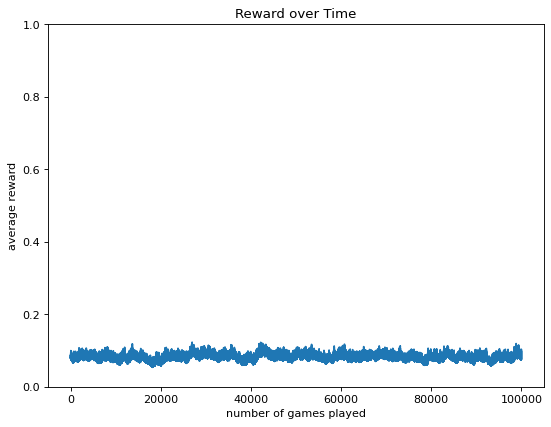

In [18]:
# Show Rewards per Game over Time
plt.figure(figsize=(8, 6), dpi=80)
x = range(0, len(rewards_per_game_list))
reward_ema = qas.exponential_moving_average(0.01, 10, rewards_per_game_list)
plt.ylim(0,1)
plt.title("Reward over Time")
plt.xlabel("number of games played")
plt.ylabel("average reward")
plt.plot(x, reward_ema)


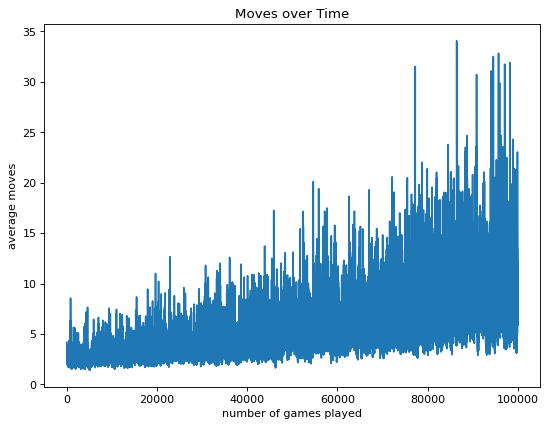

In [19]:
# Show Moves per Game over Time
plt.figure(figsize=(8, 6), dpi=80)
x = range(0, len(moves_per_game_list))
moves_ema = qas.exponential_moving_average(0.1, 10, moves_per_game_list)
plt.title("Moves over Time")
plt.xlabel("number of games played")
plt.ylabel("average moves")
plt.plot(x, moves_ema)


## 4. SARSA with changed parameters

### 4.1 Change Beta, the parameter that sets how quickly the value of epsilon is decaying

In [6]:
# Train the network for sarsa
# the following parameters can be changed: epsilon=0.2, beta=0.00005, gamma=0.85, eta=0.0035
qas = NeuralNetworkQAS(N_in, N_h, N_a, beta=0.0001)
rewards_per_game_list, moves_per_game_list = qas.train(20000, sarsa=True)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000


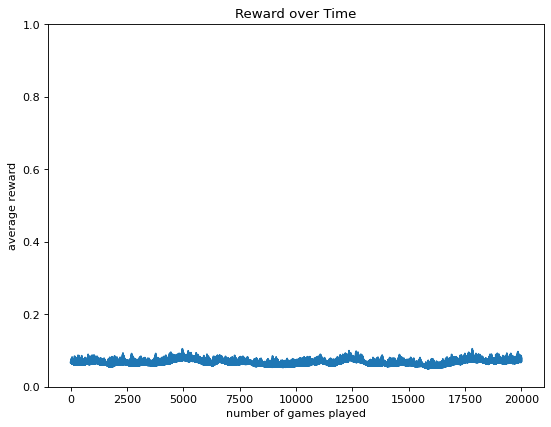

In [7]:
# Show Rewards per Game over Time
plt.figure(figsize=(8, 6), dpi=80)
x = range(0, len(rewards_per_game_list))
reward_ema = qas.exponential_moving_average(0.01, 10, rewards_per_game_list)
plt.ylim(0,1)
plt.title("Reward over Time")
plt.xlabel("number of games played")
plt.ylabel("average reward")
plt.plot(x, reward_ema)

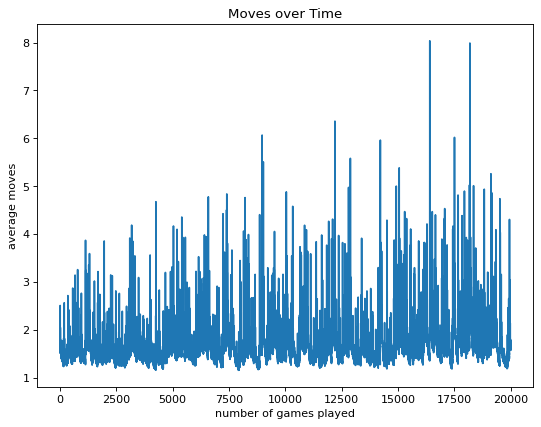

In [8]:
# Show Moves per Game over Time
plt.figure(figsize=(8, 6), dpi=80)
x = range(0, len(moves_per_game_list))
moves_ema = qas.exponential_moving_average(0.1, 10, moves_per_game_list)
plt.title("Moves over Time")
plt.xlabel("number of games played")
plt.ylabel("average moves")
plt.plot(x, moves_ema)

### 4.2 Change Gamma, the Discount Factor

In [6]:
qas = NeuralNetworkQAS(N_in, N_h, N_a, gamma=0.5)
rewards_per_game_list, moves_per_game_list = qas.train(80000, sarsa=True)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000


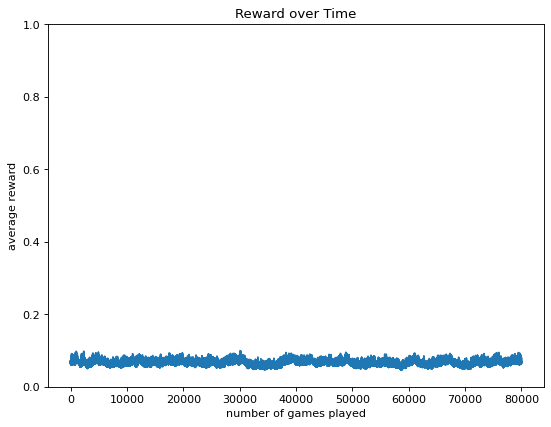

In [7]:
# Show Rewards per Game over Time
plt.figure(figsize=(8, 6), dpi=80)
x = range(0, len(rewards_per_game_list))
reward_ema = qas.exponential_moving_average(0.01, 10, rewards_per_game_list)
plt.ylim(0,1)
plt.title("Reward over Time")
plt.xlabel("number of games played")
plt.ylabel("average reward")
plt.plot(x, reward_ema)

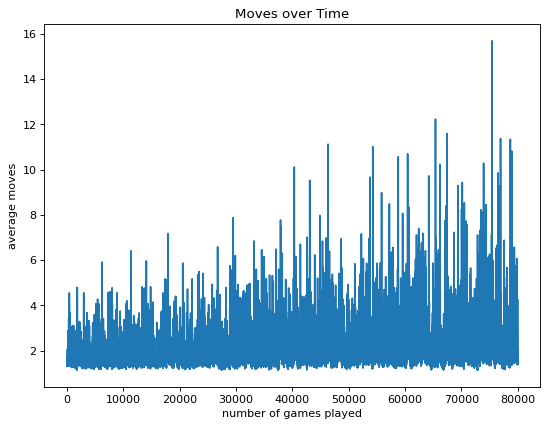

In [8]:
# Show Moves per Game over Time
plt.figure(figsize=(8, 6), dpi=80)
x = range(0, len(moves_per_game_list))
moves_ema = qas.exponential_moving_average(0.1, 10, moves_per_game_list)
plt.title("Moves over Time")
plt.xlabel("number of games played")
plt.ylabel("average moves")
plt.plot(x, moves_ema)

## 5. Q-Learning

In [5]:
qas = NeuralNetworkQAS(N_in, N_h, N_a)
rewards_per_game_list, moves_per_game_list = qas.train(15000, sarsa=False)


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000


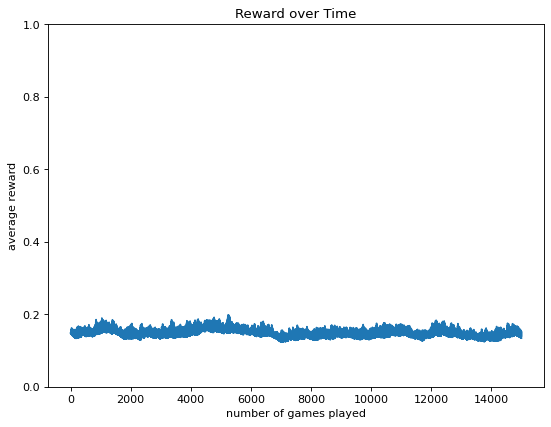

In [6]:
# Show Rewards per Game over Time
plt.figure(figsize=(8, 6), dpi=80)
x = range(0, len(rewards_per_game_list))
reward_ema = qas.exponential_moving_average(0.01, 10, rewards_per_game_list)
plt.ylim(0,1)
plt.title("Reward over Time")
plt.xlabel("number of games played")
plt.ylabel("average reward")
plt.plot(x, reward_ema)

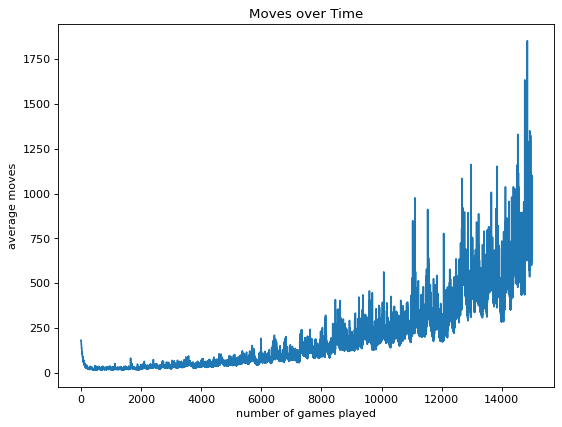

In [7]:
# Show Moves per Game over Time
plt.figure(figsize=(8, 6), dpi=80)
x = range(0, len(moves_per_game_list))
moves_ema = qas.exponential_moving_average(0.1, 10, moves_per_game_list)
plt.title("Moves over Time")
plt.xlabel("number of games played")
plt.ylabel("average moves")
plt.plot(x, moves_ema)